# Reportes por violencia de genero en Monterrey

In [32]:
# Librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style()
import plotly.graph_objects as go
import plotly.express as px
import calendar
import plotly.io as pio

In [33]:
#Reading file and checking columns
path = "D:\\Proyects\\ReportesVG\\Data\\"
data = pd.read_csv(path + "vgenero23.csv")
#droping unnecesary columns
vg_data = data.drop(columns = ['numero_reporte','latitud','longitud','corporacion'])
vg_data.isna().sum()

fecha                    0
municipio                0
colonia                 34
estado                  53
descripcion_tipo         0
hora_recepcion           0
descripcion_cierre       0
via_recepcion         5748
dtype: int64

## Cleaning data

In [34]:
#--Cleaning each columns
#Colonia
vg_data["colonia"].fillna('Sin identificar', inplace=True)
vg_data.replace(to_replace={'colonia' : {'Nino artillero':'Niño artillero' , 'Jeronimo trevino':'Jeronimo treviño', 'Jardin espanol':'Jardin español'
                                             , 'Trevino':'Treviño', 'La espanola':'La española','Espana':'España','Parque ninos heroes':'Parque niños heroes',
                                             'Parque espana':'Parque españa','Nueva espana':'Nueva españa','Cima de la montana':'Cima de la montaña',
                                             'Nueva espanola':'Nueva española','Rincon de las montanas':'Rincon de las montañas','Nueva espa„a':'Nueva españa',
                                             'Ni„o artillero':'Niño artillero','Jardin espa„ol':'Jardin español','La espa„ola':'La española','Jeronimo trevi„o':'Jeronimo treviño',
                                             'Trevi„o':'Treviño','Castanos del vergel':'Castaños del vergel', 'Municipio de san nicolas':'Colonia en San Nicolas',
                                             'Municipio de monterrey':'Sin identificar'}},inplace=True)
#Estado
vg_data['estado'].fillna('NUEVO LEON',inplace=True)
vg_data.replace(to_replace={'estado':{'NL':'NUEVO LEON'}},inplace=True)
#Descripción
vg_data.replace(to_replace={'descripcion_cierre':{'9':'No especificado'}}, inplace=True)
#Recepción
vg_data['via_recepcion'].fillna('Desconocido', inplace=True)
vg_data.replace(to_replace={'via_recepcion':{'Cic':'Centro Integración Ciudadana', 'App 9-1-1':'App','14':'No especificado','0':'No especificado','5':'No especificado'}}, inplace=True)
#Deleting all data with no location
vg_data.dropna(inplace=True)

## Data display

In [35]:
# Sunburst chart for the distribution of closed descriptions
fig1 = px.sunburst(vg_data, path=['descripcion_cierre'], color_discrete_sequence=px.colors.qualitative.Set3)
fig1.update_layout(title_text='Distribución de cierres de casos', height=500)
fig1.show()

In [36]:
# Sunburst chart for the distribution of closed descriptions
fig2 = px.sunburst(vg_data, path=['via_recepcion'], color_discrete_sequence=px.colors.qualitative.Set3)
fig2.update_layout(title_text='Distribución de vias de recepción', height=500)
fig2.show()

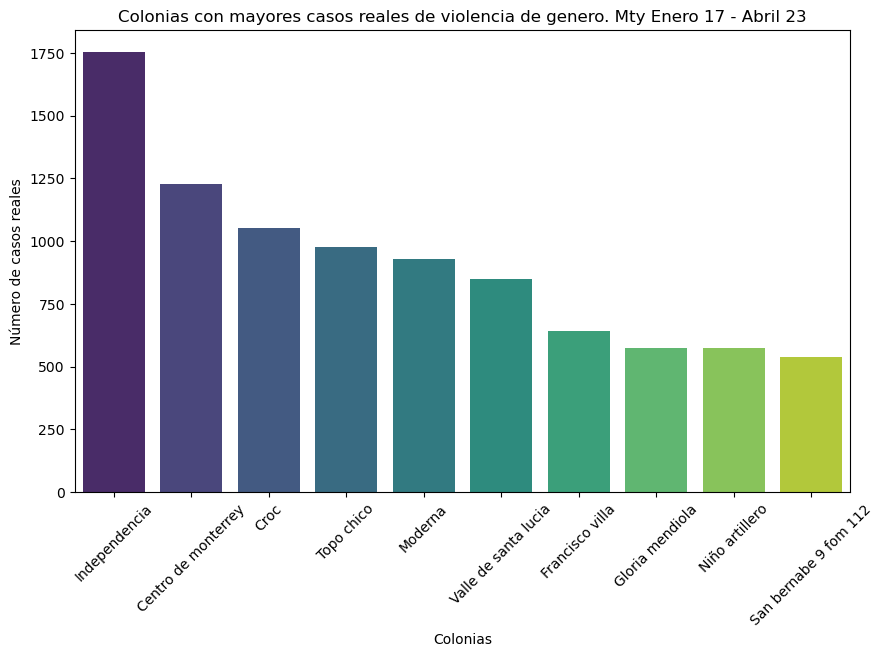

In [37]:
hecho_real = vg_data[vg_data['descripcion_cierre'] == 'Hecho real']
colonia_type_counts = hecho_real['colonia'].value_counts()
# Select the top 10 countries with the most channels for visualization
top_colonies = colonia_type_counts[:10]

# Plot size
plt.figure(figsize=(10, 6))

# Create a bar plot for the number of channels in each country
sns.barplot(x=top_colonies.index, y=top_colonies.values, palette='viridis')

# Title and labels
plt.title('Colonias con mayores casos reales de violencia de genero. Mty Enero 17 - Abril 23')
plt.xlabel('Colonias')
plt.ylabel('Número de casos reales')

# Rotate the country names for better readability
plt.xticks(rotation=45)

plt.show()

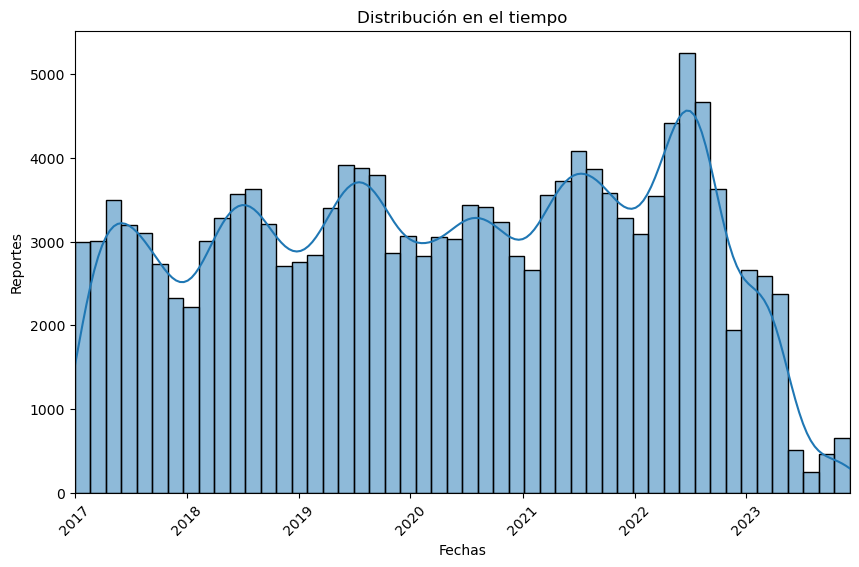

In [38]:
# Distribución por fechas
vg_data['fecha_date'] = pd.to_datetime(vg_data['fecha'])
#vg_data.drop(columns = ['fecha'], inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(vg_data['fecha_date'],bins=50 ,kde=True)
plt.title('Distribución en el tiempo')
plt.xlim(vg_data['fecha_date'].min(), vg_data['fecha_date'].max())
plt.xlabel('Fechas')
plt.ylabel('Reportes')
plt.xticks(rotation=45)
plt.show()

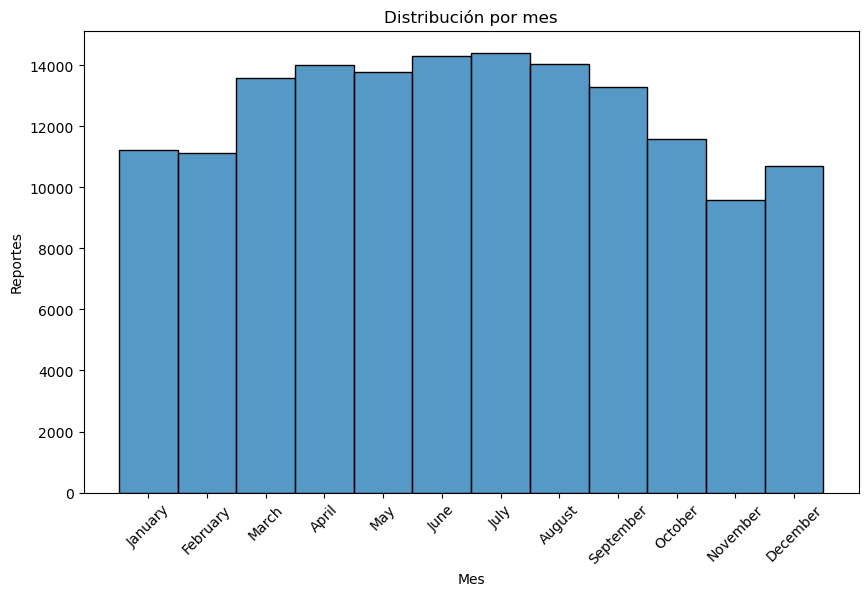

In [39]:
# Distribución por mes
vg_data['fecha_mes'] = vg_data['fecha_date'].dt.strftime('%B')
#mes = vg_data['fecha_mes'].drop_duplicates()

plt.figure(figsize=(10, 6))
sns.histplot(vg_data['fecha_mes'])
plt.title('Distribución por mes')
plt.xlabel('Mes')
plt.ylabel('Reportes')
plt.xticks(rotation=45)
plt.show()

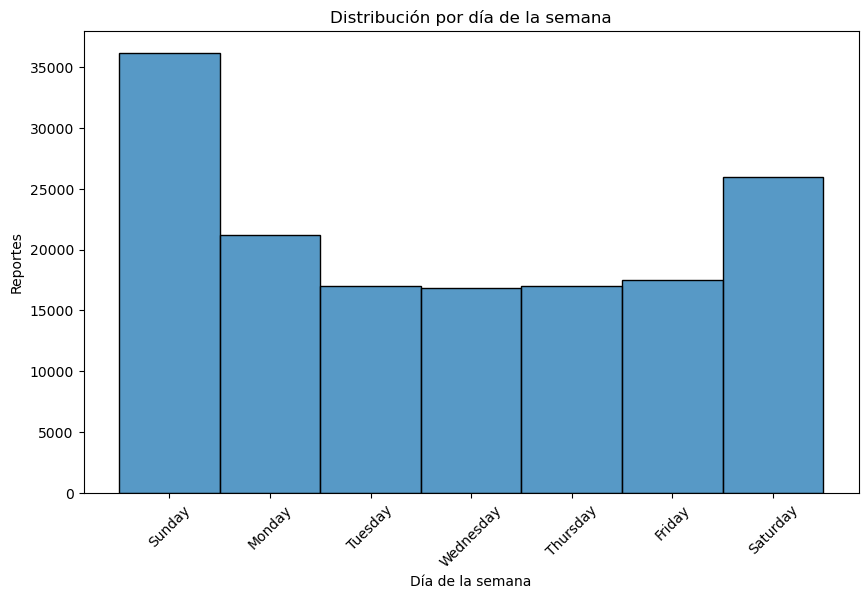

In [40]:
vg_data['fecha_dia'] = vg_data['fecha_date'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.histplot(vg_data['fecha_dia'])
plt.title('Distribución por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Reportes')
plt.xticks(rotation=45)
plt.show()

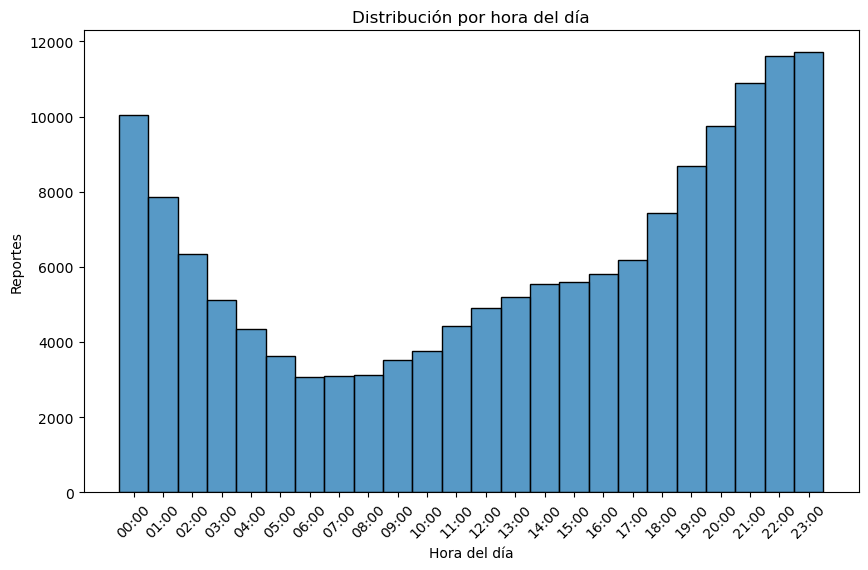

In [41]:
vg_data['hora'] = pd.to_datetime(vg_data['hora_recepcion']).dt.strftime("%H"+":00")
plt.figure(figsize=(10, 6))
sns.histplot(vg_data['hora'])
plt.title('Distribución por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Reportes')
plt.xticks(rotation=45)
plt.show()

In [42]:
value_counts = vg_data['colonia'].value_counts()

# Create a dictionary to map values to specific strings based on their frequency
value_mapping = {}

for value, frequency in value_counts.items():
    if frequency > 1000:
        value_mapping[value] = 'Muy Alta'
    elif frequency > 500:
        value_mapping[value] = 'Alto'
    elif frequency > 300:
        value_mapping[value] = 'Medio Alto'
    elif frequency > 100:
        value_mapping[value] = 'Madio Bajo'
    else:
        value_mapping[value] = 'Bajo'

# Map the original column values to the new column using the mapping dictionary
vg_data['colonia_frecuencia'] = vg_data['colonia'].map(value_mapping)

# Cambiar valores de descripcion
vg_data['real'] = np.where(vg_data['descripcion_cierre'] == 'Hecho real',1,0)

In [43]:
#Transformación de variables dummies

X_trans = pd.get_dummies(vg_data[['descripcion_tipo','colonia_frecuencia']]) #Variables dummies que obtendremos. 'colonia_frecuencia','descripcion_tipo','fecha_dia','fecha_mes','hora'

## Model fit

In [44]:
#Modelo
np.random.seed(42)

Y = vg_data['real']
#X = X_trans()

from sklearn.svm import SVC #modelo 

model = SVC(gamma = 'auto')

#split between training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_trans,
                                                   Y,
                                                   test_size=0.2)
model.fit(X_train, Y_train)

SVC(gamma='auto')

In [45]:
# Model score
model.score(X_test,Y_test)


0.7124863991559234